<img src="../../images/arm_logo.png" width=500 alt="ARM Logo"></img>

# Py-ART Basics with Xradar
---

## Overview
   
Within this notebook, we will cover:

1. General overview of Py-ART and its functionality
1. Reading data using Py-ART
1. An overview of the `pyart.Radar` object
1. Create a Plot of our Radar Data


## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Helpful | Basic features |
| [Weather Radar Basics](https://projectpythia.org/radar-cookbook/README.html) | Helpful | Background Information |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Basic plotting |
| [NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html) | Helpful | Basic arrays |
| [Xarray Basics](https://foundations.projectpythia.org/core/xarray.html) | Helpful | Multi-dimensional arrays |

- **Time to learn**: 45 minutes
---

## Imports

In [2]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt


import pyart
from pyart.testing import get_test_data
import xradar as xd

warnings.filterwarnings("ignore")

## An Overview of Py-ART

### History of the Py-ART

 * Development began to address the needs of ARM with the acquisition of a number of
   new scanning cloud and precipitation radar as part of the American Recovery Act.
 * The project has since expanded to work with a variety of weather radars and a wider user
   base including radar researchers and climate modelers.
 * The software has been released on GitHub as open source software under a BSD license.
   Runs on Linux, OS X. It also runs on Windows with more limited functionality.

### What can Py-ART Do?

[Py-ART](https://github.com/ARM-DOE/pyart) can be used for a variety of tasks from basic plotting to more complex
processing pipelines. Specific uses for Py-ART include:

 * [pyart.io](https://arm-doe.github.io/pyart/API/generated/pyart.io.html) Module for reading radar data in a variety of file formats.
 * [pyart.graph](https://arm-doe.github.io/pyart/API/generated/pyart.graph.html) Module for creating plots and visualization of radar data.
 * [pyart.correct](https://arm-doe.github.io/pyart/API/generated/pyart.correct.html) Module for correcting radar moments while in antenna coordinates, such as:
    * Doppler unfolding/de-aliasing.
    * Attenuation correction.
    * Phase processing using a Linear Programming method.
 * [pyart.map](https://arm-doe.github.io/pyart/API/generated/pyart.map.html) Mapping data from one or multiple radars onto a Cartesian grid.
 * [pyart.retrieve](https://arm-doe.github.io/pyart/API/generated/pyart.retrieve.html) Performing retrievals.
 * [pyart.io.write_cfradial](https://arm-doe.github.io/pyart/API/generated/pyart.io.write_cfradial.html) Writing radial and Cartesian data to NetCDF files.

 ### Py-ART 2.0

 [Py-ART 2.0](https://arm-doe.github.io/pyart/userguide/pyart_2_0.html) offers the option to use [`xradar`](https://docs.openradarscience.org/projects/xradar/en/stable/) for reading weather radar data into the xarray data model. Py-ART 2.0 also supports [`cmweather`](https://cmweather.readthedocs.io/en/latest/), a new package dedicated to supporting color vision deficiency (CVD) friendly colormaps. Please check the [linked documentation](https://arm-doe.github.io/pyart/userguide/pyart_2_0.html) to view all the changes within Py-ART 2.0. 
 
 ---

## Reading in Data Using Py-ART and xradar

### Reading data in using `xradar.io.open_`

When reading in a radar file, we use the `xradar.io` module.

`xradar.io` can read a variety of different radar formats, such as Cf/Radial, ODIM_H5, etc.
The documentation on what formats can be read by xradar can be found here:

* [xradar readers Documentation](https://docs.openradarscience.org/projects/xradar/en/stable/importers.html)

Let's take a look at one of these readers:

In [3]:
?xd.io.open_cfradial1_datatree

Signature: xd.io.open_cfradial1_datatree(filename_or_obj, **kwargs)
Docstring:
Open CfRadial1 dataset as :py:class:`datatree.DataTree`.

Parameters
----------
filename_or_obj : str, Path, file-like or xarray.DataStore
    Strings and Path objects are interpreted as a path to a local or remote
    radar file

Keyword Arguments
-----------------
sweep : int, list of int, optional
    Sweep number(s) to extract, default to first sweep. If None, all sweeps are
    extracted into a list.
first_dim : str
    Can be ``time`` or ``auto`` first dimension. If set to ``auto``,
    first dimension will be either ``azimuth`` or ``elevation`` depending on
    type of sweep. Defaults to ``auto``.
reindex_angle : bool or dict
    Defaults to False, no reindexing. Given dict should contain the kwargs to
    reindex_angle. Only invoked if `decode_coord=True`.
fix_second_angle : bool
    If True, fixes erroneous second angle data. Defaults to ``False``.
optional : bool
    Import optional mandatory data 

Let's use a sample data file from `pyart` - which is [**cfradial** format](https://github.com/NCAR/CfRadial).

When we read this in, we get a [`xarray.DataTree` object](https://docs.xarray.dev/en/stable/generated/xarray.DataTree.html#xarray.DataTree) that bundles the different radar sweeps into one structure!

In [12]:
file = "/data/project/ARM_Summer_School_2025/radar/csapr2/ppi/bnfcsapr2cfrS3.a1.20250315.190050.nc"
dt = xd.io.open_cfradial1_datatree(file)
dt

DataTree('root', parent=None)
│   Dimensions:              (sweep: 15)
│   Dimensions without coordinates: sweep
│   Data variables:
│       sweep_fixed_angle    (sweep) float32 60B ...
│       sweep_group_name     (sweep) <U10 600B 'sweep_0.0' ... 'sweep_14.0'
│       time_coverage_end    |S22 22B ...
│       time_coverage_start  |S22 22B ...
│       volume_number        float64 8B ...
│       latitude             float32 4B ...
│       longitude            float32 4B ...
│       altitude             float32 4B ...
│   Attributes:
│       Conventions:      ARM-1.3 CF/Radial-1.4 instrument_parameters radar_param...
│       title:            ARM CSAPR2 Moments
│       institution:      U.S. Department of Energy Atmospheric Radiation Measure...
│       references:       See Instrument Handbook
│       comment:          
│       instrument_name:  CSAPR2
│       scan_name:        ppi
│       site_name:        bnfS3
│       source:           FROG 4.7.10:branch-4.7:muran-4.7.10:1001:mars-lxc-u20:2...
│       history:          created by user dsmgr on machine prod-proc4.adc.arm.gov...
├── DataTree('radar_parameters')
├── DataTree('georeferencing_correction')
├── DataTree('sweep_0')
│       Dimensions:                                                (azimuth: 360,
│                                                                   range: 1100)
│       Coordinates:
│           time                                                   (azimuth) datetime64[ns] 3kB ...
│         * range                                                  (range) float32 4kB ...
│         * azimuth                                                (azimuth) float32 1kB ...
│           elevation                                              (azimuth) float32 1kB ...
│           latitude                                               float32 4B ...
│           longitude                                              float32 4B ...
│           altitude                                               float32 4B ...
│       Data variables: (12/38)
│           time_offset                                            (azimuth) datetime64[ns] 3kB ...
│           attenuation_corrected_differential_reflectivity        (azimuth, range) float32 2MB ...
│           attenuation_corrected_differential_reflectivity_lag_1  (azimuth, range) float32 2MB ...
│           attenuation_corrected_reflectivity_h                   (azimuth, range) float32 2MB ...
│           censor_mask                                            (azimuth, range) int32 2MB ...
│           classification_mask                                    (azimuth, range) int32 2MB ...
│           ...                                                     ...
│           unthresholded_power_copolar_v                          (azimuth, range) float32 2MB ...
│           sweep_fixed_angle                                      float32 4B ...
│           nyquist_velocity                                       (azimuth) float32 1kB ...
│           prt                                                    (azimuth) float32 1kB ...
│           sweep_mode                                             <U6 24B 'sector'
│           sweep_number                                           float64 8B ...
├── DataTree('sweep_1')
│       Dimensions:                                                (azimuth: 361,
│                                                                   range: 1100)
│       Coordinates:
│           time                                                   (azimuth) datetime64[ns] 3kB ...
│         * range                                                  (range) float32 4kB ...
│         * azimuth                                                (azimuth) float32 1kB ...
│           elevation                                              (azimuth) float32 1kB ...
│           latitude                                               float32 4B ...
│           longitude                                              float32 4B ...
│           alti

### Investigate the [`xradar` object](https://docs.openradarscience.org/projects/xradar/en/stable/notebooks/CfRadial1.html)

Within this [`xradar` object](https://docs.openradarscience.org/projects/xradar/en/stable/notebooks/CfRadial1.html) object are the actual data fields, each stored in a different group, mimicking the FM301/cfradial2 data standard.

This is where data such as reflectivity and velocity are stored.

To see what fields are present we can add the fields and keys additions to the variable where the radar object is stored.

In [13]:
dt["sweep_0"]

DataTree('sweep_0', parent="root")
    Dimensions:                                                (azimuth: 360,
                                                                range: 1100)
    Coordinates:
        time                                                   (azimuth) datetime64[ns] 3kB ...
      * range                                                  (range) float32 4kB ...
      * azimuth                                                (azimuth) float32 1kB ...
        elevation                                              (azimuth) float32 1kB ...
        latitude                                               float32 4B ...
        longitude                                              float32 4B ...
        altitude                                               float32 4B ...
    Data variables: (12/38)
        time_offset                                            (azimuth) datetime64[ns] 3kB ...
        attenuation_corrected_differential_reflectivity        (azimuth, range) float32 2MB ...
        attenuation_corrected_differential_reflectivity_lag_1  (azimuth, range) float32 2MB ...
        attenuation_corrected_reflectivity_h                   (azimuth, range) float32 2MB ...
        censor_mask                                            (azimuth, range) int32 2MB ...
        classification_mask                                    (azimuth, range) int32 2MB ...
        ...                                                     ...
        unthresholded_power_copolar_v                          (azimuth, range) float32 2MB ...
        sweep_fixed_angle                                      float32 4B ...
        nyquist_velocity                                       (azimuth) float32 1kB ...
        prt                                                    (azimuth) float32 1kB ...
        sweep_mode                                             <U6 24B 'sector'
        sweep_number                                           float64 8B ...

#### Extract a sample data field

The fields are stored in a dictionary, each containing coordinates, units and more.
All can be accessed by just adding the fields addition to the radar object variable.

For an individual field, we add a string in brackets after the fields addition to see
the contents of that field.

Let's take a look at `'corrected_reflectivity_horizontal'`, which is a common field to investigate.

In [14]:
print(dt["sweep_0"]["uncorrected_reflectivity_h"])

<xarray.DataArray 'uncorrected_reflectivity_h' (azimuth: 360, range: 1100)> Size: 2MB
[396000 values with dtype=float32]
Coordinates:
    time       (azimuth) datetime64[ns] 3kB 2025-03-15T00:00:13.781999 ... 20...
  * range      (range) float32 4kB 0.0 100.0 200.0 ... 1.098e+05 1.099e+05
  * azimuth    (azimuth) float32 1kB 0.5219 1.544 2.554 ... 357.5 358.6 359.5
    elevation  (azimuth) float32 1kB ...
    latitude   float32 4B ...
    longitude  float32 4B ...
    altitude   float32 4B ...
Attributes:
    long_name:          Uncorrected Reflectivity, Horizontal Channel
    units:              dBZ
    standard_name:      equivalent_reflectivity_factor
    unpacking_details:  Can be unpacked as follows: multiply packed values by...


We can go even further in the dictionary and access the actual reflectivity data.

We use add `.data` at the end, which will extract the **data array** (which is a numpy array) from the dictionary.

In [16]:
reflectivity = dt["sweep_0"]["uncorrected_reflectivity_h"].data
print(type(reflectivity), reflectivity)

<class 'numpy.ndarray'> [[16.169746  12.304158  14.100647  ... 16.010887  15.720625  14.526235 ]
 [12.296313  11.109768  11.001901  ... 12.617955  11.786393  11.502014 ]
 [16.142288  10.931296  16.201126  ... 12.519894  14.834147  14.602722 ]
 ...
 [15.406827  15.0596895  9.258366  ... 18.995882  20.555061  19.254765 ]
 [11.7962    10.123268  12.527739  ... 19.594057  15.3224945 18.236885 ]
 [14.712551  13.573075  14.082995  ... 12.149221  11.835424  10.58808  ]]


Lets' check the size of this array...

In [17]:
reflectivity.shape

(360, 1100)

This reflectivity data array, numpy array, is a two-dimensional array with dimensions:
- Range (distance away from the radar)
- Azimuth (direction around the radar)

In [18]:
dt["sweep_0"].dims

Frozen({'azimuth': 360, 'range': 1100})

If we wanted to look the 300th ray, at the second gate, we would use something like the following:

In [19]:
print(reflectivity[300, 2])

12.888605


We can also select a specific azimuth if desired, using the xarray syntax:

In [20]:
dt["sweep_0"].sel(azimuth=180, method="nearest")

DataTree('sweep_0', parent=None)
    Dimensions:                                                (range: 1100)
    Coordinates:
        time                                                   datetime64[ns] 8B ...
      * range                                                  (range) float32 4kB ...
        azimuth                                                float32 4B 179.5
        elevation                                              float32 4B ...
        latitude                                               float32 4B ...
        longitude                                              float32 4B ...
        altitude                                               float32 4B ...
    Data variables: (12/38)
        time_offset                                            datetime64[ns] 8B ...
        attenuation_corrected_differential_reflectivity        (range) float32 4kB ...
        attenuation_corrected_differential_reflectivity_lag_1  (range) float32 4kB ...
        attenuation_corrected_reflectivity_h                   (range) float32 4kB ...
        censor_mask                                            (range) int32 4kB ...
        classification_mask                                    (range) int32 4kB ...
        ...                                                     ...
        unthresholded_power_copolar_v                          (range) float32 4kB ...
        sweep_fixed_angle                                      float32 4B ...
        nyquist_velocity                                       float32 4B ...
        prt                                                    float32 4B ...
        sweep_mode                                             <U6 24B 'sector'
        sweep_number                                           float64 8B ...

---

## Plotting our Radar Data

### An Overview of Py-ART Plotting Utilities

Now that we have loaded the data and inspected it, the next logical thing to do is to visualize the data! Py-ART's visualization functionality is done through the objects in the [pyart.graph](https://arm-doe.github.io/pyart/API/generated/pyart.graph.html) module.

In Py-ART there are 4 primary visualization classes in pyart.graph:

* [RadarDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.html)
* [RadarMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.html)
* [AirborneRadarDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.AirborneRadarDisplay.html)

Plotting grid data
* [GridMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.GridMapDisplay.html)

### Use the [RadarMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.html) with our data

For the this example, we will be using `RadarMapDisplay`, using Cartopy to deal with geographic coordinates.


We start by creating a figure first, and adding our traditional radar methods to the xradar object.

In [21]:
fig = plt.figure(figsize=[10, 10])
radar = pyart.xradar.Xradar(dt)

<Figure size 1000x1000 with 0 Axes>

Once we have a figure, let's add our `RadarMapDisplay`

In [22]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.RadarMapDisplay(radar)

<Figure size 1000x1000 with 0 Axes>

Adding our map display without specifying a field to plot **won't do anything** we need to specifically add a field to field using `.plot_ppi_map()`

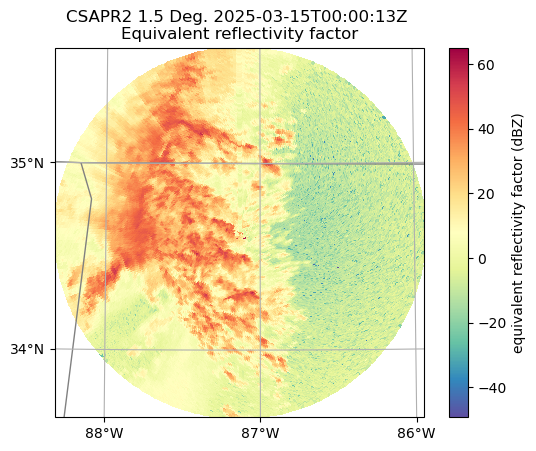

In [24]:
display.plot_ppi_map("uncorrected_reflectivity_h")

By default, it will plot the elevation scan, the the default colormap from `Matplotlib`... let's customize!

We add the following arguements:
- `sweep=3` - The fourth elevation scan (since we are using Python indexing)
- `vmin=-20` - Minimum value for our plotted field/colorbar
- `vmax=60` - Maximum value for our plotted field/colorbar
- `projection=ccrs.PlateCarree()` - Cartopy latitude/longitude coordinate system
- `cmap='pyart_HomeyerRainbow'` - Colormap to use, selecting one provided by PyART 

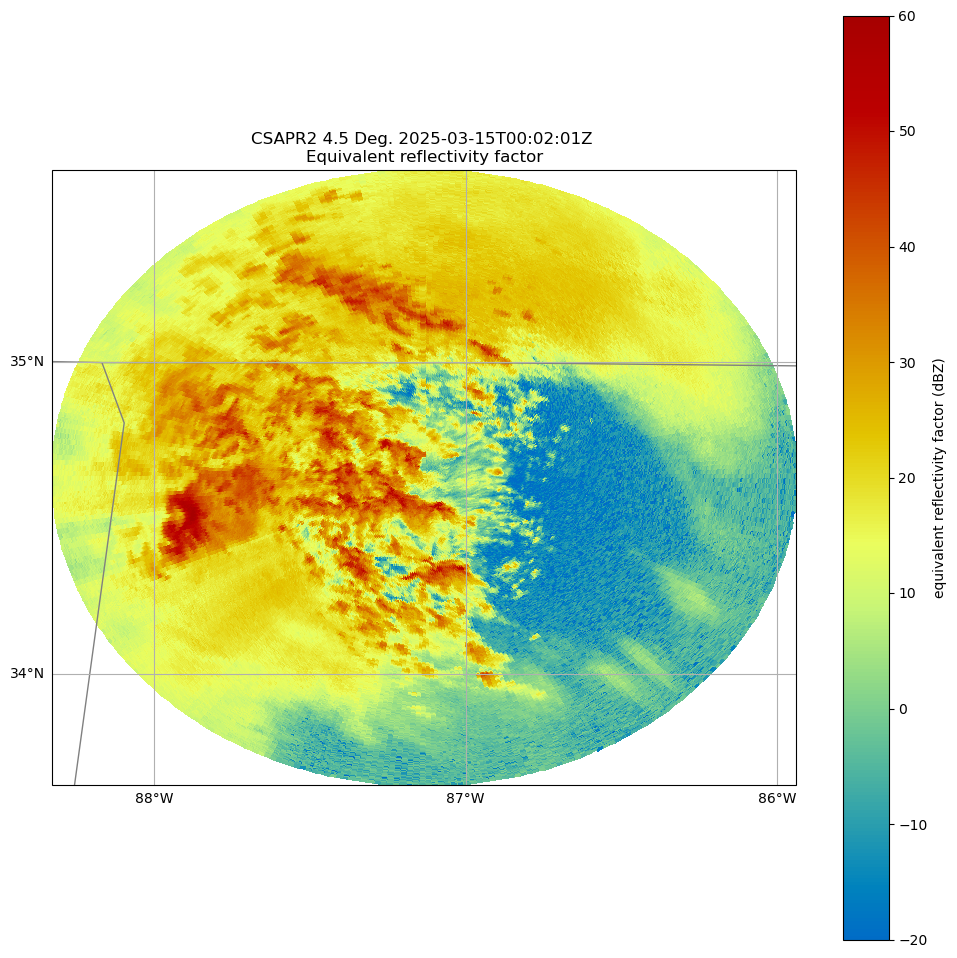

In [25]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    "uncorrected_reflectivity_h",
    sweep=3,
    vmin=-20,
    vmax=60,
    projection=ccrs.PlateCarree(),
    cmap="HomeyerRainbow",
)
plt.show()

You can change many parameters in the graph by changing the arguments to plot_ppi_map. As you can recall from earlier. simply view these arguments in a Jupyter notebook by typing:

In [26]:
?display.plot_ppi_map

Signature:
display.plot_ppi_map(
    field,
    sweep=0,
    mask_tuple=None,
    vmin=None,
    vmax=None,
    cmap=None,
    norm=None,
    mask_outside=False,
    title=None,
    title_flag=True,
    colorbar_flag=True,
    colorbar_label=None,
    colorbar_orient='vertical',
    ax=None,
    fig=None,
    lat_lines=None,
    lon_lines=None,
    projection=None,
    min_lon=None,
    max_lon=None,
    min_lat=None,
    max_lat=None,
    width=None,
    height=None,
    lon_0=None,
    lat_0=None,
    resolution='110m',
    shapefile=None,
    shapefile_kwargs=None,
    edges=True,
    gatefilter=None,
    filter_transitions=True,
    embellish=True,
    add_grid_lines=True,
    raster=False,
    ticks=None,
    ticklabs=None,
    alpha=None,
    edgecolors='face',
    **kwargs,
)
Docstring:
Plot a PPI volume sweep onto a geographic map.

Parameters
----------
field : str
    Field to plot.
sweep : int, optional
    Sweep number to plot.

Other Parameters
----------------
mask_tuple 

Or, let's view a different elevation scan! To do this, change the sweep parameter in the plot_ppi_map function.

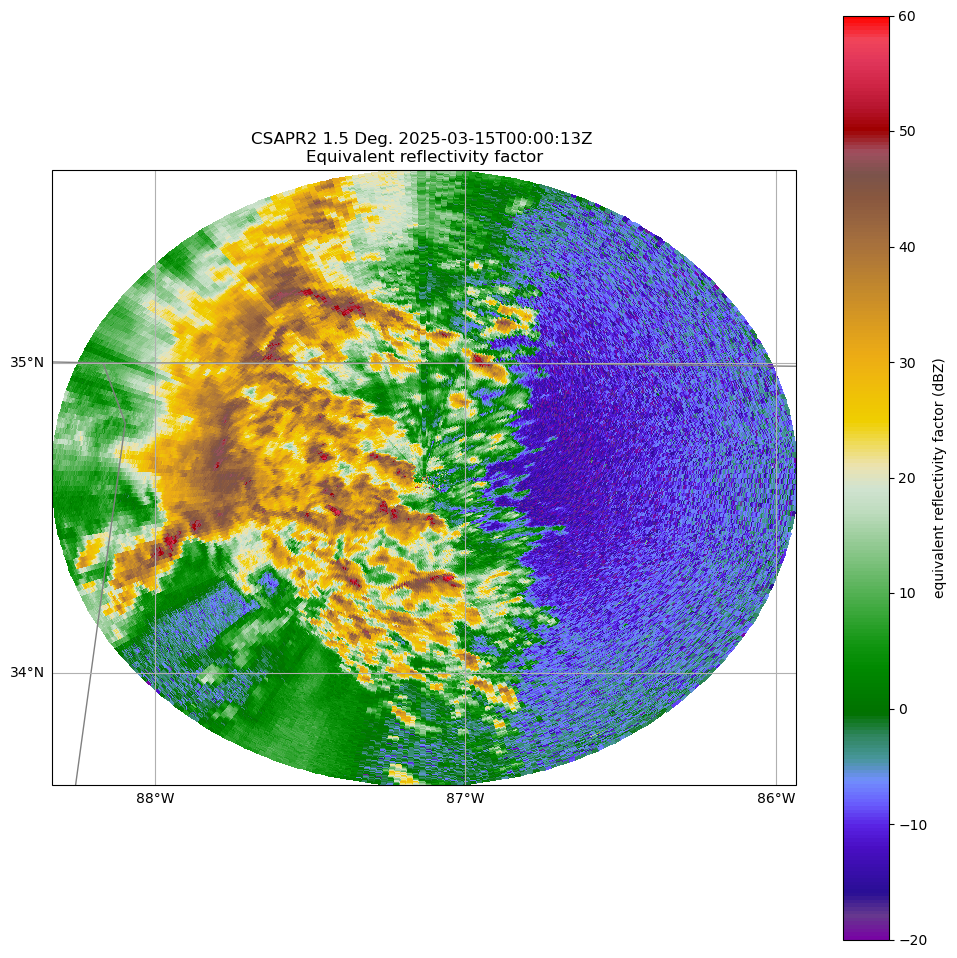

In [27]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    "uncorrected_reflectivity_h",
    sweep=0,
    vmin=-20,
    vmax=60,
    projection=ccrs.PlateCarree(),
    cmap="Carbone42",
)
plt.show()

---

## Gridding with Py-ART
Gridding is an important workflow to understand when working with radar data! Here, we walk through the steps required.

### Antenna vs. Cartesian Coordinates

Radar data, by default, is stored in a **polar (or antenna) coordinate system**, with the data coordinates stored as an angle (ranging from 0 to 360 degrees with 0 == North), and a radius from the radar, and an elevation which is the angle between the ground and the ground.

This format can be challenging to plot, since it is scan/radar specific. Also, it can make comparing with model data, which is on a lat/lon grid, challenging since one would need to **transform** the model daa cartesian coordinates to polar/antenna coordiantes.

Fortunately, PyART has a variety of gridding routines, which can be used to **grid your data to a Cartesian grid**. Once it is in this new grid, one can easily slice/dice the dataset, and compare to other data sources.

### Why is Gridding Important?

Gridding is essential to combining multiple data sources (ex. multiple radars), and comparing to other data sources (ex. model data). There are also decisions that are made during the gridding process that have a large impact on the regridded data - for example:
- What resolution should my grid be?
- Which interpolation routine should I use?
- How smooth should my interpolated data be?

While there is not always a right or wrong answer, it is important to understand the options available, and document which routine you used with your data! Also - experiment with different options and choose the best for your use case!

### The Grid Object
We can **transform our data** into this grid object, from the radars, using `pyart.map.grid_from_radars()`.

Beforing gridding our data, we need to make a decision about the desired grid resolution and extent. For example, one might imagine a grid configuration of:
- Grid extent/limits
    - 20 km in the x-direction (north/south)
    - 20 km in the y-direction (west/east)
    - 15 km in the z-direction (vertical)
- 500 m spatial resolution

The `pyart.map.grid_from_radars()` function takes the grid shape and grid limits as input, with the order `(z, y, x)`.

Let's setup our configuration, setting our grid extent **first**, with the distance measured in **meters**

In [47]:
z_grid_limits = (500.,15_000.)
y_grid_limits = (-30_000.,30_000.)
x_grid_limits = (-30_000.,30_000.)

Now that we have our grid limits, we can set our desired resolution (again, in meters)

In [48]:
grid_resolution = 500

Let's compute our grid shape - using the extent and resolution to compute the number of grid points in each direction.

In [49]:
def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0])/resolution)

Now that we have a helper function to compute this, let's apply it to our vertical dimension

In [50]:
z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
z_grid_points

29

We can apply this to the horizontal (x, y) dimensions as well.

In [51]:
x_grid_points = compute_number_of_points(x_grid_limits, grid_resolution)
y_grid_points = compute_number_of_points(y_grid_limits, grid_resolution)

print(z_grid_points,
      y_grid_points,
      x_grid_points)

29 120 120


#### Use our configuration to grid the data!
Now that we have the grid shape and grid limits, let's grid up our radar!

In [52]:
grid = pyart.map.grid_from_radars([radar],
                                  grid_shape=(z_grid_points,
                                              y_grid_points,
                                              x_grid_points),
                                  grid_limits=(z_grid_limits,
                                               y_grid_limits,
                                               x_grid_limits),
                                 )
grid

### Plot the Grid Object

#### Plot a horizontal view of the data
We can use the `GridMapDisplay` from `pyart.graph` to visualize our regridded data, starting with a horizontal view (slice along a single vertical level)

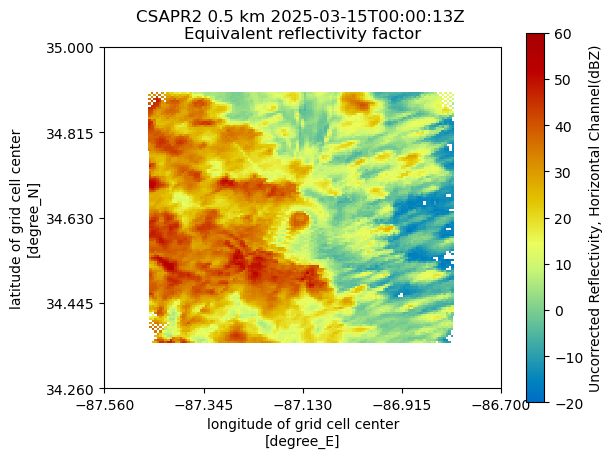

In [53]:
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('uncorrected_reflectivity_h',
                  level=0,
                  vmin=-20,
                  vmax=60,
                  cmap='HomeyerRainbow')

#### Plot a Latitudinal Slice

We can also slice through a single latitude or longitude!

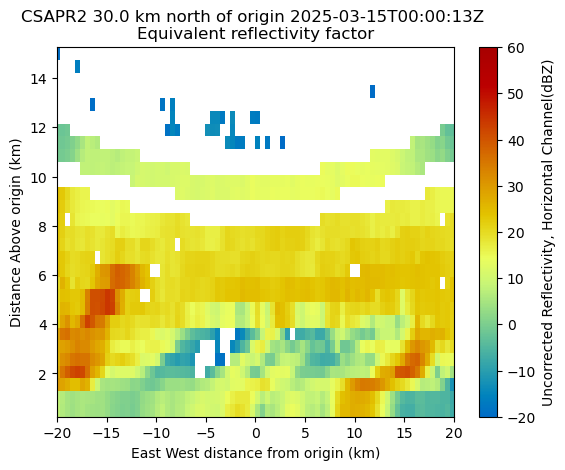

In [54]:
display.plot_latitude_slice('uncorrected_reflectivity_h',
                            lat=36.5,
                            vmin=-20,
                            vmax=60,
                            cmap='HomeyerRainbow')
plt.xlim([-20, 20]);

#### Plot with Xarray

Another neat feature of the `Grid` object is that we can transform it to an `xarray.Dataset`!

In [55]:
ds = grid.to_xarray()
ds

<xarray.Dataset> Size: 59MB
Dimensions:                                                (time: 1, z: 29,
                                                            y: 120, x: 120,
                                                            nradar: 1)
Coordinates: (12/16)
  * time                                                   (time) object 8B 2...
  * z                                                      (z) float64 232B 5...
    lat                                                    (y, x) float64 115kB ...
    lon                                                    (y, x) float64 115kB ...
  * y                                                      (y) float64 960B -...
  * x                                                      (x) float64 960B -...
    ...                                                     ...
    origin_altitude                                        (time) float32 4B ...
    radar_altitude                                         (nradar) float32 4B ...
    radar_latitude                                         (nradar) float32 4B ...
    radar_longitude                                        (nradar) float32 4B ...
    radar_time                                             (nradar) float64 8B ...
    radar_name                                             (nradar) <U6 24B '...
Dimensions without coordinates: nradar
Data variables: (12/33)
    unthresholded_power_copolar_v                          (time, z, y, x) float32 2MB ...
    differential_reflectivity_lag_1                        (time, z, y, x) float32 2MB ...
    normalized_coherent_power                              (time, z, y, x) float32 2MB ...
    mean_doppler_velocity_v                                (time, z, y, x) float32 2MB ...
    reflectivity_v                                         (time, z, y, x) float32 2MB ...
    uncorrected_differential_reflectivity_lag_1            (time, z, y, x) float32 2MB ...
    ...                                                     ...
    unthresholded_power_copolar_h                          (time, z, y, x) float32 2MB ...
    attenuation_corrected_differential_reflectivity_lag_1  (time, z, y, x) float32 2MB ...
    uncorrected_differential_phase                         (time, z, y, x) float32 2MB ...
    uncorrected_spectral_width_h                           (time, z, y, x) float32 2MB ...
    uncorrected_reflectivity_v                             (time, z, y, x) float32 2MB ...
    ROI                                                    (time, z, y, x) float32 2MB ...
Attributes:
    radar_name:       CSAPR2
    nradar:           1
    Conventions:      ARM-1.3 CF/Radial-1.4 instrument_parameters radar_param...
    title:            ARM CSAPR2 Moments
    institution:      U.S. Department of Energy Atmospheric Radiation Measure...
    references:       See Instrument Handbook
    comment:          
    instrument_name:  CSAPR2
    scan_name:        ppi
    site_name:        bnfS3
    source:           FROG 4.7.10:branch-4.7:muran-4.7.10:1001:mars-lxc-u20:2...
    history:          created by user dsmgr on machine prod-proc4.adc.arm.gov...

Now, our plotting routine is a **one-liner**, starting with the horizontal slice:

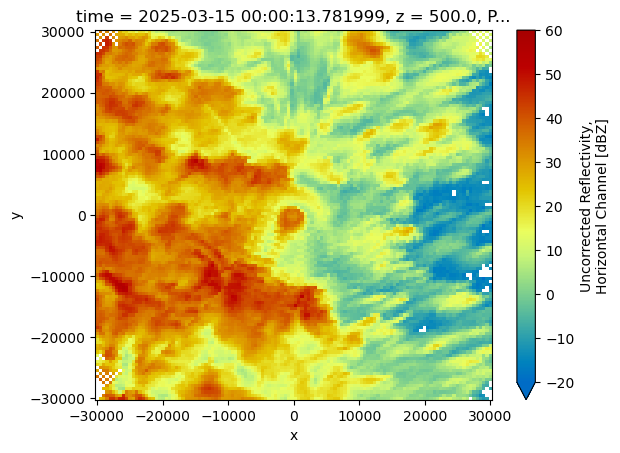

In [56]:
ds.isel(z=0).uncorrected_reflectivity_h.plot(cmap='HomeyerRainbow',
                                             vmin=-20,
                                             vmax=60);

And a vertical slice at a given y dimension (latitude)

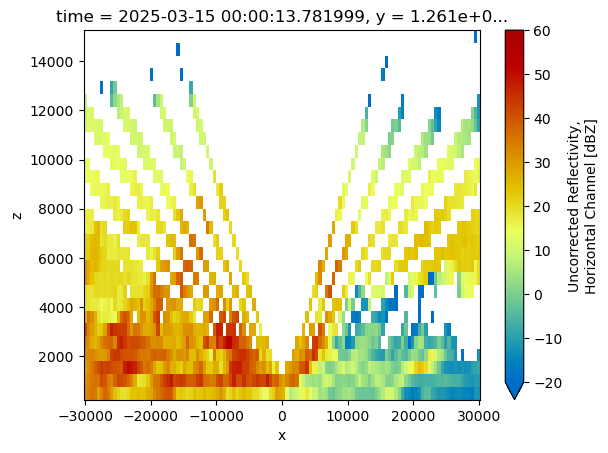

In [57]:
ds.sel(y=1300,
       method='nearest').uncorrected_reflectivity_h.plot(cmap='HomeyerRainbow',
                                                         vmin=-20,
                                                         vmax=60);

## Challenge
Find data from last night's event and plot it up! Feel free to grid, etc.

Hint: the site code is `bnf` with the instrument being `csapr2`

https://adc.arm.gov

---
## Summary
Within this notebook, we covered the basics of working with radar data using `pyart`, including:
- Reading in a file using `xradar.io`
- Investigating the `xradar` object
- Visualizing radar data using the `RadarMapDisplay`
- Gridding with Py-ART
- Visualizing gridded output

### What's Next
In the next few notebooks, we walk through applying data cleaning methods, and advanced visualization methods!

## Resources and References
Py-ART essentials links:

* [Landing page](https://arm-doe.github.io/pyart/)
* [Examples](https://arm-doe.github.io/pyart/examples/index.html)
* [Source Code](https://github.com/ARM-DOE/pyart)
* [Mailing list](https://groups.google.com/group/pyart-users/)
* [Issue Tracker](https://github.com/ARM-DOE/pyart/issues)